## Implementation and comparison of K-nearest neighbors (KNN) and convolutional neural network (CNN) for clothes recognition
#### Data Analysis MoBi SoSe2023, Topic 01: Image Analysis
#### Tutor: Hannah Winter
#### Team 04: Ole Decker, Heinrike Gilles, Bastian Mucha, Anastasia Warken
#### July 2023


## Abstract

In this work, the image classification algorithms K-nearest neighbors (KNN) and Convolutional Neural Network (CNN) were investigated and compared by testing both on the Fashion-MNIST dataset, featuring images of different clothing items of 10 categories. The preparation of the dataset included performing a Z-transformation and data dimension reduction using Principal Component Analysis (PCA). The optimal amount of variance and number of k for KNN was determined. To improve KNN efficiency, KD-Trees were implemented. The performance of the two algorithms were compared and evaluated. The CNN yielded a higher accuracy compared to the KNN, although the KNNs accuracy was still higher than expected. These results met the expectations, since KNN is a basic algorithm, while CNN is a modern, state-of-the-art deep learning model. 
In a modified confusion matrix it was found, that in both algorithms the categories "T-Shirt/ Top" and "Shirt" were often wrongly classified. In an attempt to overcome this confusion a CNN was implemented grouping these two classes together followed by a seperate CNN only classifying between the categories "T-Shirt/ Top" and "Shirt". 

<span style='color:red'>
- Ergänzen: War T-Shirt / Top erfolgreich?
</span>

## Introduction

Whether it is Zalando, Amazon or Shein, the online fashion market is continously growing. In 2023, predictions say the global fashion e-commerce market will surpass a value of 820 billion U.S. dollars. 
<span style='color:red'>
[Quelle 1]
</span>
Therefore, there is a demand for optimizing classification algorithms for clothing recognition. The Zalando Fashion-MNIST dataset is serves as an optimal tool for for benchmarking machine learning algorithms. It is a a balanced dataset comprised of 60,000 training images and 10,000 test images. 
<span style='color:red'>
[Quelle 2]
</span>
In this project the classification algorithms K-nearest neighbors (KNN) and Convolutional Neural Network (CNN) algorithms were implemented and compared. The first one being a simple, but effective standard machine learning algorithm, while the Convolutional Neural Network algorithm is a complex modern attempt of imitating the neuron structure of the brain. 
<span style='color:red'>
[Quelle 3 & 4]
</span>
Prior to applying the algorithms to the dataset, preprocessing was performed in the form of normalization of the data and dimensional reduction using principal component analysis (PCA).<br>
The KNN algorithm algorithm organizes the data into cohesive clusters or subsets and categorizes newly inputted data by comparing it to previously trained data. The input is assigned to the class that shares the highest similarity with its nearest neighbors. 
<span style='color:red'>
[Quelle 3] <br>
</span>
CNN belongs to the artificial neural networks and is specialized in image analysis. Convolutions are applied to the images in order to recognize patterns. This technique can be used for classification problems, as it is done in this project. 
<span style='color:red'>
[Quelle 4] <br>
</span>

## Material

#### Imports

For coding, optimization and visualization several functions from the packages numpy, pandas, seaborn, matplotlib and tensorflow keras were used.
An overview over all libraries used can be found in the imports.yml file.

#### Dataset

The dataset applied is Zalandos Fashion-MNIST dataset. MNIST stands for Modified National Institute of Standards and Technology database. The dataset consists of 70,000 images of Zalando clothing articles and is often used for benchmarking machine learning algorithms. Each image has the size of 28 x 28 pixels in grayscale and has been categorized into one of 10 classes, which include T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle boot. The dataset is split into a training set containing 60,000 images and a test set comprising 10,000 images. The dataset is in form of a CSV file (comma separated value). Each row contains the information for one image. The first column of values consists of the class of each image ranging from 0 to 9, the following columns are the intensity values of each pixel, varying between 0 and 255.
These are 100 example images of the clothing items. 
All items fill the image to a comparable extend and the item is located in the center of the image.
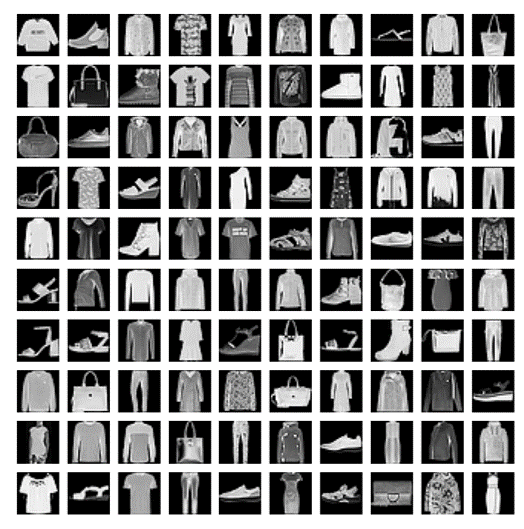

## Methods
#### Z-transformation
A Z-transformation is a statistical technique used to standardize and normalize data. It transforms a dataset into a standard normal distribution with a mean of 0 and a standard deviation of 1. It is performed by subtracting the mean of the dataset from each datapoint and then dividing it by the standard deviation. 
The Z-Transformation is applied to the intensity value of each pixel of each image, in order to improve performance and convergence of our KNN and CNN. Standardizing the pixel intensities helps to avoid certain features dominating the learning process, e.g. high intensity pixels in the background of the images. Normalizing the data improves pixel comparability

#### PCA
A Principal Component Analysis (PCA) is a method used to reduce the dimensions of a high dimensional dataset while preserving the most important information and minimizing the loss of variance. This technique is done as a preparation to make a machine learnig process more efficient by reducing redundancy.
To perform a PCA a Covariance matrix is calculated using the Z-transformed dataset. The covariance matrix gives the relationship of each pixel intensity value of all images, each row being an eigenvector. The eigenvalues are calculated using the covariance matrix. Each eigenvalue corresponds to an eigenvector and represents the explained variance of this vector. The larger the eigenvalue, the more variance is captured along that eigenvector or principal component. <br>
The final step in a PCA is to choose the percentage of variance the data is supposed to describe and then removing all redundant Principal Components.
We implemented PCA using NumPy by computing a covariance matrix using the Z-transformed data and then calculating the eigenvalues. <br>
These were then resorted in ascending order by absolute value, since eigenvalues can have positive or negative values, where only the absolute holds the information of amount of variance explained.

#### K-nearest neighbors (KNN)
K-nearest neighbors (KNN) is a non-parametric, supervised learning algorithm. In the context of our project it was used for classification but it can also be used for regression tasks. The KNN makes predictions based on the similarity of input data points to their neighboring data points by measuring the distance to all reference points and then finding the k nearest points. Euclidean distance was used as a distance calculation method. The class of the test data point is assigned by a so-called majority vote, meaning the class the majority of the nearest points have is selected. 

KNN belongs to the family of lazy-learning models. The algorithm stores the entire training dataset and uses it as reference for each testing data point instead of undergoing a training phase. As a consequence the run time is long, compared to algorithms that feature a training phase.
To calculate the k nearest neighbors the size of k has to be determined. To find the optimal k the proof by exhaustion method was applied. The KNN was run with different numbers for k 
and then the performance was measured. Subsequently he value for k with the highest accuracy was chosen. Normally this method is done using a validation data set, but in this case the test data set was used directly. <br>

The aim for the KNN was to correctly classify images of clothing items, by comparing each test image with all images from the training data set and then comparing the predicted labels to the actual classification. The closest neighbors of the sample image were determined based on the smallest difference in intensity values between the images.

#### KD-trees
Since the KNN algorithm is not very time efficient due to it's way of operating, k-dimensioan trees or KD-trees are a tool to use clever data structures to optimize the classification process. K is defined by the number of properties each data point has, in this context it is the dimensions, so it corresponds to the number of PCs selected.
The concept is based on the repeated division of the space along the median value of one of the dimensions. This can be shown in a binary tree structure. Each node is a splitting hyperplane, which is defined by one of the axis. The training points are divided in the tree whether the coordinate value for that axis is larger or smaller.
In which order the axes are chosen during division can vary, but a common approach is to rotate through each of the dimensions.
How many partitions of the space are made can be chosen by changing the leaf size. The leaf size is the maximal number of data points that can be contained in a final node at the bottom of the KD-tree. A smaller leaf size generates a larger tree with more partitions, making the construction time longer, a larger leaf size can result in an unbalanced tree and slow down the search time. However the leaf size does not affect the result of the query. <br>
To find the nearest neighbors of the test point the tree is traced from top to bottom following the shortest distance found so far. To check at the bottom of the tree whether there is a closer point in another branch of the tree, recursion takes place. The distances to the previous division axes are calculated and then the nodes below will be checked for closer neighbors. This is done until the distance to the division axis exceeds the distance to the previously found closest neighbor. When the height of the tree is n, a maximum of 2n nodes will be checked in recursion for a smaller distance to the test data point. 
<span style="color:red"> 
hier KD Tree einfügen
</span>

#### Convolutional Neural Network (CNN)
 
A convolutional neural network is a deep learning model based on the concept of an artificial neural network. It is mainly used for the analysis of visual data like images or videos, because it works by detecting patterns in an hierarchical strucutre. A CNN consists of different types of layers: convolutional layer, activation layer, pooling layer, fully connected layer, dropout layer and batch normalization layer. Not all these layers will be explained here. The most important are the convolutional layers. Each layer can consist of multiple convolutional filters. A filter is a small matrix with a defined number of rows and columns. It convolves over all blocks of pixels of the input image. The product of the filter is passed on to the next layer. The filters are what detects the patterns. These become more and more sophisticated the deeper the network becomes. For example the filters in the first convolutional layer may only detect edges, while a filter in a deeper layer  recognizes complex shapes. <br>
The convolutional layers set a CNN apart from other neural networks. Perks of a CNN are that all layers are fully connected, making it extremly complex when using images with many pixels. Also the features of an image are detected in the context of the surrounding pixels and not by their absolute intensity values, meaning edges are recognized as edges regardless of their brightness. Another advantage is that convolutional filters are trainable to be able to recognize different features and patterns.
After each convolution layer a nonlinear activation function is applied. It determines which neurons are activated in the CNN. 
This way complex relationships betwen the input data and desired output can be modeled. 
A standard activation function in CNN is ReLU, standing for Rectified Linear Unit. This function outputs the input directly if it is positive, and zero otherwise. <br>
The pooling layers reduce the spatial dimensions of the input image to reduce the number of parameters and the computational load. It condenses the features in a region and summarizes it, which makes it more robust to variations of feature-position within the images. Most commonly used is the max pooling. The output layer then features only the maximum elements of all regions, translating to the most prominent features.

#### Evaluation methods

To measure and compare the performance and effectiveness of the classification algorithms, the accuracy and confusion matrix were chosen as evaluation methods. 
The accuracy gives the percentage how many images were classified correctly. This is done by dividing the number of correct predictions by the number of total predictions. This evaluation method gives a good overview how well the algorithm is working, 
but to get a deeper insight on common misclassifications, an enhanced version of a confusion matrix was used. A confusion matrix compares the predicted class of the objects to the actual class. In the cells the number of objects that fall into that category are given. To make our KNN & CNN confusion matrix more comparable, We substracted the expected values of the confusion matrix from the observed values. Expected values means the values th would be observed if the algorithm was unbiased and each class could be detected just as good as every other class.

## Results

###
---

Ole's Version:

#### PCA

```{toggle}
soll PCA hier her? Sollen wir drauf eingehen, wieviel schneller mit/ohne?
The PCA was self coded, but for effiency reasons a precoded package was used for the final results.
```




#### Optimal number of k and PCs
After successful data preparation and implementation of KNN, the optimal number of principal component variance and number of neighbors was determined by running KNN for ks between 2 and 15 for the principal component variances 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95 and 1. 

<img src="../Plots/projectsummary.png" width=600>

The colors indicate the principal component variance. The x-axis indicates the number of k, the y-axis the accuracy. 
The accuracy, that was achieved with the CNN is indicated as a line.

This indicates, that the optimal combination of number of ks and principal component variance is k = 4 and var = 0.95.





The colors indicate the principal component variance. The x-axis indicates the number of k, the y-axis indicates the accuracy.
The accuracy, that was achieved with the CNN is indicated as a line.

This indicates, that the optimal combination of number of ks and principal component variance is k = 4 and var = 0.95.

#### KNN in comparison to CNN



<img src="../Plots/hmap_shirts_notsum.png" width=600>
<img src="../Plots/hmap_shirts_sum.png" width=600>


The following modified confusion matrices indicate, how well the individual images are being assigned, relative to the expected assignments.

KNN
<img src="../Plots/knn_chi.png" width=600>
CNN
<img src="../Plots/cnn_chi.png" width=600>

The x-axis represent the actual labels aand the y-axis the predicted labels.
The diagonal elements indicate values that are correctly assigned, in contrast to the non diagonal elements, which are falsely assigned. The diagonal elements are calculated through substraction of expected assignment numbers from the observed ones, whereas the non diagonal elements reflect the observed assignment numbers substracted from the expected ones, thus being the sign reversal calculation to the diagonal elements. 

Comparison of the two matrices leads to the supposition that there are certain labels closely related to eachother, because they share the same assignemnt errors through diffrent evaluation methods. The example here would be the cateories "Shirt" and "T-shirt / Top", which are often assigned to the other category.



#### KD-trees

We implemented KD-trees to speed up the KNN.
We use the timeit function to determin the leavesize. We do this, by timeing the usage of the trained KD-trees, with the diffrent leavesizes "1, 10, 20, 50, 100". The KD-Tree with the leavesize: ... is able to assign labels to the test images in the fastest manner, with ... minutes

---

###






#### Comparing KNN and KNN with KDTrees
```{toggle}
benutzt man bei KDTrees nicht trotzdem KNN, also kein 1v1 vergleich?
```

KD-Trees were implemented with a leaf size of 10. This parameter corresponds to the number of points that can be in a designated divided space in the tree. The lower the leaf size, the deeper the tree - since creating deep but inefficient trees is redundant, the optimal leaf size was determined. 

In general, the KD-Tree algorithm yielded a running time of approximately 22.8 seconds for a leaf-size of 10. The original KNN function is not far behind with a running time of approximately 26.4 seconds. 

The KD-Tree algorithm was then timed for the leaf sizes 1, 10, 20, 50 and 100. The different leaf sizes yielded very similar running times with the best running time achieved with a leaf size of 50. 


#### Comparing KNN and CNN
CNN was implemented using a modified vgg model [citation here]. 

![complex_model_vis.jpg](attachment:complex_model_vis.jpg)

The yellow layers mark the convolution layers. The red layers mark the pooling layers, the turquoise ones the batch normalization. 
Light blue is a flattening layer, dark blue are fully connected layers and the yellow layers at the end mark the neuron dropout layers. 






## Discussion

## Bibliography

1. Statista
2. Fashion MNIST dataset
3. Taunk K., De S., Verma S., Swetapadma A. A brief review of nearest neighbor algorithm for learning and classification; Proceedings of the 2019 International Conference on Intelligent Computing and Control Systems (ICCS); Madurai, India. 15–17 May 2019; pp. 1255–1260.
4. Uhrig R.E. Introduction to artificial neural networks; Proceedings of the IECON’95-21st Annual Conference on IEEE Industrial Electronics; Orlando, FL, USA. 6–10 November 1995; [(accessed on 26 October 2022)]. pp. 33–37.